In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:

import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
Movies = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/rotten_tomatoes_movies.csv')
Movies.head(1)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [11]:

Movies2 = Movies[['movie_title','genres','audience_rating','runtime']]

In [10]:
Movies3_filtered = Movies2[Movies2['genres'].isin(['Horror'])].dropna()

My hypothesis is that longer action movies are more popular, and shorter horror movies are more popular. This can be tested by taking in a number of movies from both genres. I will use 60 movies and run a pearsonr test to see if there is a correlation between these two variables. This is valuable to you so that when you are producing a movie you can make your movie more presentable to the movie going audience and generate more profit. For streaming services this could be invaluable data in choosing which movies they should add to their catalog of movies that they intend to host on their streaming platform.

In [ ]:
Movies3_filtered.head(60)

,movie_title,genres,audience_rating,runtime
33,Malevolence,Horror,83.0,90.0
244,April Fool's Day,Horror,47.0,89.0
356,Carrie,Horror,77.0,98.0
393,Day of the Dead,Horror,75.0,102.0
408,Dolls,Horror,51.0,77.0
450,Fright Night,Horror,76.0,106.0
651,The Phantom of the Opera,Horror,53.0,90.0
661,Poltergeist,Horror,79.0,114.0
674,Prom Night,Horror,35.0,91.0
678,The Prowler,Horror,49.0,88.0


In [ ]:
Movies3_filtered.sort_values('runtime').iloc[0:60]

,movie_title,genres,audience_rating,runtime
12273,Rammbock: Berlin Undead,Horror,59.0,59.0
10728,The Mummy's Ghost,Horror,20.0,60.0
10042,Manborg,Horror,57.0,70.0
2879,Aquaslash,Horror,27.0,71.0
13442,The Slumber Party Massacre,Horror,44.0,73.0
10069,Manos: The Hands of Fate,Horror,20.0,74.0
9516,Lights Out,Horror,61.0,77.0
408,Dolls,Horror,51.0,77.0
14835,The Devil's Doorway,Horror,45.0,77.0
2932,Artik,Horror,26.0,78.0


In [ ]:
stats.pearsonr(Movies3_filtered['runtime'],Movies3_filtered['audience_rating'])

(0.24088605088436058, 2.9648574985956714e-07)

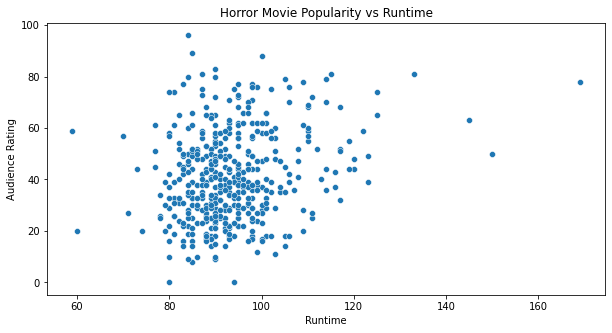

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="runtime", y="audience_rating", data=Movies3_filtered)
plt.xlabel("Runtime")
plt.ylabel("Audience Rating")
plt.title('Horror Movie Popularity vs Runtime')
plt.show()

As we can see by the graph respresented above, my hypothesis is correct there is direct correlation between runtime and popularity as we show that the majority of popular horror movies have a shorter runtime then longer ones which are very few.

In [12]:
Movies4_filtered = Movies2[Movies2['genres'].isin(['Action & Adventure'])].dropna()

In [13]:
Movies4_filtered.head(60)

,movie_title,genres,audience_rating,runtime
197,Bitch Slap,Action & Adventure,29.0,104.0
336,Breakout,Action & Adventure,41.0,96.0
380,Commando,Action & Adventure,67.0,90.0
604,Missing in Action,Action & Adventure,42.0,102.0
631,Nighthawks,Action & Adventure,54.0,99.0
683,Raw Deal,Action & Adventure,28.0,105.0
688,Red Dawn,Action & Adventure,65.0,114.0
767,"Tarzan, the Ape Man",Action & Adventure,19.0,112.0
883,The Hitman,Action & Adventure,45.0,95.0
943,Sniper,Action & Adventure,55.0,99.0


In [14]:
Movies4_filtered.sort_values('runtime').iloc[0:60]

,movie_title,genres,audience_rating,runtime
8858,Justice League: Gods and Monsters,Action & Adventure,71.0,72.0
4048,Bring Me the Head of the Machine Gun Woman (Tr...,Action & Adventure,43.0,75.0
2826,Antboy,Action & Adventure,36.0,77.0
8406,Intensive Care,Action & Adventure,14.0,80.0
1435,Torque,Action & Adventure,41.0,81.0
3726,Blind Fury,Action & Adventure,51.0,82.0
2903,Jackpot,Action & Adventure,55.0,82.0
11643,Passenger 57,Action & Adventure,38.0,83.0
15319,The Last Heist,Action & Adventure,12.0,84.0
16904,Vigilante Diaries,Action & Adventure,69.0,84.0


In [15]:
stats.pearsonr(Movies4_filtered['runtime'],Movies4_filtered['audience_rating'])

(0.3949216402755179, 6.019562883900148e-09)

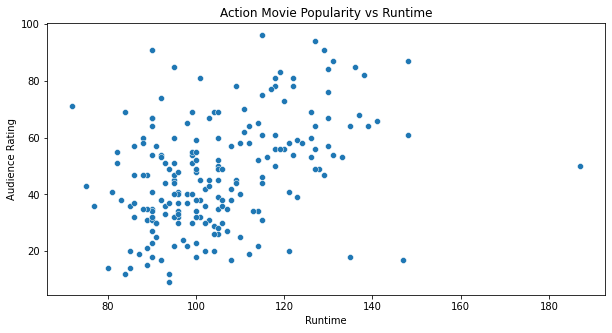

In [17]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="runtime", y="audience_rating", data=Movies4_filtered)
plt.xlabel("Runtime")
plt.ylabel("Audience Rating")
plt.title('Action Movie Popularity vs Runtime')
plt.show()

As we can see by the graph respresented above, my hypothesis is correct there is direct correlation between runtime and popularity as we show that the majority of popular action movies have a longer runtime then shorter action movies which have a very poor rating.